In [70]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib
#Importing Important libraries
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
from haversine import haversine
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [55]:
import os
# We initialise the function to read data as required.
# If we pass train.csv in dataSet, we get the training data and if we pass train.csv in dataSet, we get the testing data.
def loadData(dataSet):
    dataPath = os.path.join("data", "")
    csvPath = os.path.join(dataPath, dataSet)
    return pd.read_csv(csvPath)

In [56]:
trainingData = loadData("train.csv")
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [57]:
testingData = loadData("test.csv")
testingData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Mean trip duration is: 6.4645211752676754


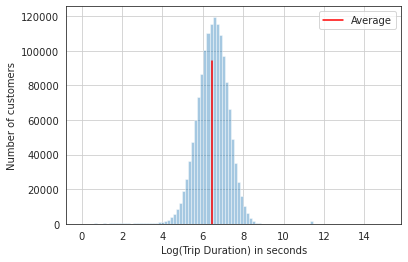

In [58]:
# Here we add a new column named log_trip_duration which is simply the log of trip duration in base 10.
# The plot below shows the log_trip_duration plotted against the number of customers
# As you can clearly see by the red line, the meanTrip duration (in log) is 6.46.
trainingData['log_trip_duration'] = np.log(trainingData['trip_duration'].values)
meanTripDuration = trainingData.log_trip_duration.mean()
print("Mean trip duration is: " + str(meanTripDuration))
with sns.axes_style("white"): 
    trainingData.log_trip_duration.hist(bins=100, alpha=0.4)
    plt.axvline(meanTripDuration, 0, 0.75, color="red", label="Average")
    plt.xlabel("Log(Trip Duration) in seconds")
    plt.ylabel("Number of customers")
    plt.legend()

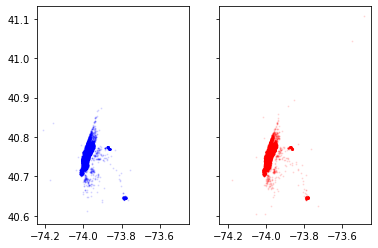

In [59]:
N = 10000
city_long_border = (-75, -75)
city_lat_border = (40, 40)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(trainingData["pickup_longitude"].values[:N],
             trainingData["pickup_latitude"].values[:N],
             color="blue", s=1, label="Training Data", alpha=0.1)

ax[1].scatter(testingData["pickup_longitude"].values[:N],
             testingData["pickup_latitude"].values[:N],
             color="red", s=1, label="Training Data", alpha=0.1)

In [60]:
# Lets check for null values in our data. If the data contains any null values, then while training these might cause error.
# Luckily, our data has no entries which are null and hence we don't need to clean it up.
trainingData.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
log_trip_duration     0
dtype: int64

In [61]:
testingData.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [62]:
# This is our training label column. Since we are using supervised learning for this assignment,
# the label will be what we will predict in our testing data.
trainingLabel = trainingData.pop('trip_duration')

In [64]:
trainingLabel

0           455
1           663
2          2124
3           429
4           435
           ... 
1458639     778
1458640     655
1458641     764
1458642     373
1458643     198
Name: trip_duration, Length: 1458644, dtype: int64

In [82]:
# We change the date time and drop time features in our data to type datetime to make it easier for us to manipulate it.
trainingData["pickup_datetime"] = pd.to_datetime(trainingData["pickup_datetime"])
trainingData["dropoff_datetime"] = pd.to_datetime(trainingData["dropoff_datetime"])
# Similarly for the testing data
testingData["pickup_datetime"] = pd.to_datetime(testingData["pickup_datetime"])

In [92]:
trainingData["weekday"] = trainingData.pickup_datetime.dt.day_name()
trainingData["weekdayNum"] = trainingData.pickup_datetime.dt.weekday
trainingData["month"] = trainingData.pickup_datetime.dt.month
trainingData["pickupHour"] = trainingData.pickup_datetime.dt.hour

testingData["weekday"] = testingData.pickup_datetime.dt.day_name()
testingData["weekdayNum"] = testingData.pickup_datetime.dt.weekday
testingData["month"] = testingData.pickup_datetime.dt.month
testingData["pickupHour"] = testingData.pickup_datetime.dt.hour

In [93]:
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,weekday,weekdayNum,month,pickupHour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,Monday,0,3,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,Wednesday,2,4,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,Saturday,5,3,13


In [100]:
# Distance function to get the distance between two places.
def distance(dataSet):
    pickuploc = (dataSet["pickup_latitude"], dataSet["pickup_longitude"])
    dropoffloc = (dataSet["dropoff_latitude"], dataSet["dropoff_longitude"])
    return haversine(pickuploc, dropoffloc)

In [108]:
# We add this distance to the training data as a new coloumn for every ride. 
# this will help up to make better predictions using more features
trainingData["distance"] = trainingData.apply(lambda x: distance(x) , axis = 1)

In [105]:
trainingData.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration,weekday,weekdayNum,month,pickupHour,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,Monday,0,3,17,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,Sunday,6,6,0,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,Tuesday,1,1,11,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,Wednesday,2,4,19,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,Saturday,5,3,13,1.188590


In [104]:
# Similarly we add distance column to the testingData to help make predictions. 
testingData["distance"] = testingData.apply(lambda x: distance(x) , axis = 1)

In [106]:
testingData.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,weekday,weekdayNum,month,pickupHour,distance
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,Thursday,3,6,23,2.746430
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,Thursday,3,6,23,2.759243
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,Thursday,3,6,23,1.306157
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,Thursday,3,6,23,5.269095
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,Thursday,3,6,23,0.960843


In [107]:
trainingData.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object
